In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 讀入 Tensorflow

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [6]:
### 看數據內容

In [7]:
len(x_train)

60000

In [8]:
len(y_train)

60000

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

正確答案: Coat


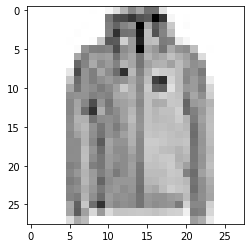

In [10]:
n = 567

plt.imshow(x_train[n], cmap='Greys')
print('正確答案:',class_names[y_train[n]])

In [11]:
### 資料整理

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train, 10)

In [17]:
y_test = to_categorical(y_test,10)

In [18]:
### 打造神經網路

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD

In [20]:
## 開一台空白的機器學習機

In [21]:
model = Sequential()

In [22]:
model.add(Dense(53,input_dim=784, activation = 'relu'))

In [23]:
model.add(Dense(35, activation='relu'))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
### 組裝我們的神經網路

In [26]:
model.compile(loss='mse', optimizer=SGD(lr=0.035), metrics=['accuracy'])

In [27]:
### 訓練

In [32]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0222 - accuracy: 0.8502
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0220 - accuracy: 0.8507
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0220 - accuracy: 0.8513
Epoch 4/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0219 - accuracy: 0.8523
Epoch 5/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0218 - accuracy: 0.8526
Epoch 6/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0217 - accuracy: 0.8532
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0217 - accuracy: 0.8535
Epoch 8/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0216 - accuracy: 0.8539
Epoch 9/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0215 - accuracy: 0.8544
Epoch 10/20
60

In [29]:
result = model.predict_classes(x_test)

神經網路預設是 T-shirt/top


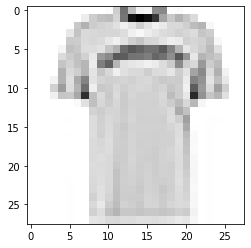

In [34]:
n = 1854

print('神經網路預設是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')